<a href="https://colab.research.google.com/github/amalvarezme/MineriaDatos/blob/master/multivariateNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

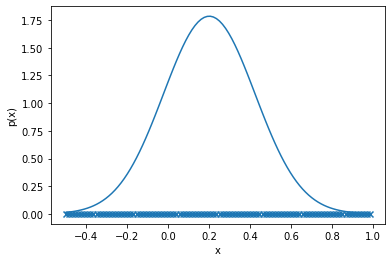

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np
from scipy.stats import multivariate_normal as mn

x = np.linspace(-0.5, 1, 100, endpoint=False)
y = mn.pdf(x, mean=0.2, cov=0.05)
plt.scatter(x,np.zeros(x.shape[0]),marker='x')
plt.xlabel('x')
plt.ylabel('p(x)')

plt.plot(x, y)

$$\int p(x) dx = 1$$

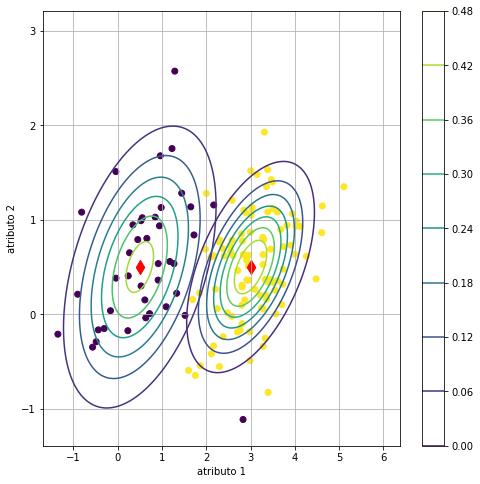

In [22]:
#clase 1 
mu1 = np.array([0.5,0.5]) #.fit -> estimar la mu1
cov1 = np.array([[0.8, 0.3],[0.3,0.6]]) #.fit -> estimar la cov1
N1 = 40 # numero puntos c1 -> estimar desde etiquetas
pdf1 = mn(mu1, cov1) # objeto scipy ara evaluar o muestrear gaussiana multivariada


#clase 2
mu2 = np.array([3,0.5]) #.fit -> estimar la mu1
cov2 = np.array([[0.5, 0.2],[0.2,0.3]]) #.fit -> estimar la cov1
N2 = 100 # numero puntos c1 -> estimar desde etiquetas
pdf2 = mn(mu2, cov2) # objeto scipy ara evaluar o muestrear gaussiana multivariada

X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)] # muestrear de las dos pdfs los datos (NO hacer esto-los datos X los ingresa el usuario)
y = np.r_[-1.0*np.ones((N1,1)),np.ones((N2,1))] #etiquetas, -1 y +1 para el problema binario

#myclass_cBayes().fit(Xtrain,ytrain), Xtrain Ntrain x P,  ytrain Ntrain

xx, yy = np.mgrid[1.25*min(X[:,0]):1.25*max(X[:,0]):.01, 1.25*min(X[:,1]):1.25*max(X[:,1]):.01] #graficar pdf en espacio de caract. 2D
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

plt.figure(figsize=(8,8))  
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(mu1[0],mu1[1], c='r', marker='d',s = 100)
plt.scatter(mu2[0],mu2[1], c='r', marker='d',s = 100)
plt.contour(xx, yy, pdf1.pdf(pos))
plt.contour(xx, yy, pdf2.pdf(pos))
plt.colorbar()
plt.grid()
plt.xlabel('atributo 1')
plt.ylabel('atributo 2')
plt.show()


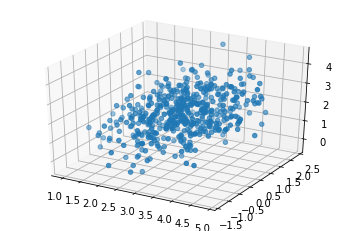

(3,) (3, 3)
[0.95733489 0.44643355 0.14131411]
(500, 2)


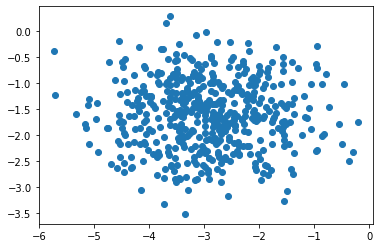

In [36]:
mu3 = np.array([3,0.5,2]) #.fit -> estimar la mu1
cov3 = np.array([[0.5, 0.2,0.1],[0.2,0.4,0.3],[0.1,0.3,0.6]]) #.fit -> estimar la cov1
N3 = 500 # numero puntos c1 -> estimar desde etiquetas
pdf3 = mn(mu3, cov3) # objeto scipy ara evaluar o muestrear gaussiana multivariada

#X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)]
X3 = pdf3.rvs(size=N3)

X3.shape
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0],X3[:,1],X3[:,2])
plt.show()
#pca
C = np.cov(X3.T)
[val,vec]=np.linalg.eig(C)
print(val.shape,vec.shape)
print(val)
Z = X3 @ vec[:,:2] # N x P  P x P
print(Z.shape)
plt.scatter(Z[:,0],Z[:,1])

$$\Sigma_c = \begin{bmatrix} \sigma^{c,2}_1 & cov^c(1,2) & \cdots & cov^c(1,P)\\
cov^c(2,1) & \sigma^{c,2}_2 & \cdots & cov^c(2,P)\\
\vdots   & \vdots & \ddots & \vdots \\
cov^c(P,1) & cov^c(P,2) & \cdots & \sigma^{c,2}_P
\end{bmatrix}$$

In [ ]:
pdf1.pdf(mu1)

0.25485187206258914

In [ ]:
#mu1 = np.array([0.2,0.5])
#cov1 = np.array([[0.5, 0.3],[-0.3,0.2]])
#N1 = 100
#rv1 = mn(mu1, cov1)

In [ ]:
#rv1.rvs(size=100)

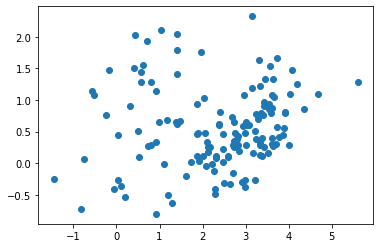

In [ ]:
ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)] #transform -> evaluar pdf despues de encontrar mu_c y Cov_c

plt.scatter(X[:,0],X[:,1])#,c=ye.argmax(axis=1))

(884, 391, 2)


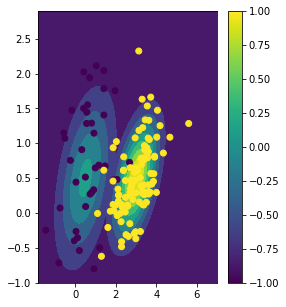

In [ ]:
# predict
dc1 = pdf1.pdf(pos) # pdf1.pdf(Xtest)
dc2 = pdf2.pdf(pos) # pdf2.pdf(Xtest)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1 #* (N1/X.shape[0]) #marginal cada clase
pb[:,:,1] = dc2 #* (N2/X.shape[0])
#ytest_e = pb.argmax(axis=2) # etiquetas estimadas

print(pb.shape)
plt.figure(figsize=(4,5))
plt.contourf(xx, yy,pb.max(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [ ]:
pb.shape

(820, 391, 2)